# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [16]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [21]:
# Criando uma função bivariada, passando o dataFrame, a variável resposta e a variável explicativa.
def bivariada_qualitativa(df, var_resposta, var_explicativa):
    return pd.crosstab(df[var_resposta], df[var_explicativa], margins=True)

In [20]:
# Chamando a função com a variável resposta 'sex' e a variável explicativa 'flag_doente' 
tab_sex = bivariada_qualitativa(df, 'sex', 'flag_doente')
tab_sex

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [18]:
# Chamando a função com a variável resposta 'cp' e a variável explicativa 'flag_doente'
tab_cp = bivariada_qualitativa(df, 'cp', 'flag_doente')
tab_cp

flag_doente,0,1,All
cp,,,
1.0,16,7,23
2.0,41,9,50
3.0,68,18,86
4.0,39,105,144
All,164,139,303


In [19]:
# Chamando a função com a variável resposta 'slope' e a variável explicativa 'flag_doente'
tab_slope = bivariada_qualitativa(df, 'slope', 'flag_doente')
tab_slope

flag_doente,0,1,All
slope,,,
1.0,106,36,142
2.0,49,91,140
3.0,9,12,21
All,164,139,303


A que mais discrima o risco é cp, pelo alto índice de dor no peito: assintomático

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [22]:
# Criando uma função bivariada, passando o dataFrame, a variável resposta, a variável explicativa e o número de quebras.
def bivariada_quantitativa(df, coluna_agrupar, nome_coluna_agrupada, var_explicativa, bins=5):
    df[nome_coluna_agrupada] = pd.cut(df[coluna_agrupar], bins=bins)
    return pd.crosstab(df[nome_coluna_agrupada], df[var_explicativa], margins=True)

In [23]:
tab_age = bivariada_quantitativa(df, 'age', 'group_age', 'flag_doente')
tab_age

flag_doente,0,1,All
group_age,,,
"(28.952, 38.6]",8,3,11
"(38.6, 48.2]",50,21,71
"(48.2, 57.8]",56,41,97
"(57.8, 67.4]",40,67,107
"(67.4, 77.0]",10,7,17
All,164,139,303


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [26]:
reglog = smf.logit("flag_doente ~ sex + C(cp) + trestbps",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.493233
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.2849
Time:                        14:53:18   Log-Likelihood:                -149.45
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.908e-24
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.9260      1.371     -4.323      0.000      -8.613      -3.240
C(cp)[T.2.0]    -0.1907      0.621     -0.307      0.759      -1.409       1.027
C(cp)[T.3.0]     0.0065      0.559      0.012      0.991      -1.089       1.102
C(cp)[T.4.0]     2.4260      0.539      4.501      0.000       1.370       3.482
sex              1.6297      0.340      4.794      0.000       0.963       2.296
trestbps         0.0259      0.008      3.114      0.002       0.010       0.042
================================================================================
"""

cp 4 (como havíamos visto acima), sex e trestbps estão fortemente ligadas à explicação de flag_doente. 

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [31]:
# Calculando a probalidade
df['predito'] = reglog.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,group_age,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(57.8, 67.4]",0.368788
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(57.8, 67.4]",0.906991
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(57.8, 67.4]",0.775651
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.952, 38.6]",0.284996
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(38.6, 48.2]",0.060273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(38.6, 48.2]",0.190813
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(67.4, 77.0]",0.865607
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(48.2, 57.8]",0.817535
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(48.2, 57.8]",0.060273


In [40]:
# Dividindo em 5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')

In [41]:
# Probalidade de evento predita média por grupo
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0288, 0.159]",61,0.076784
"(0.159, 0.287]",60,0.235353
"(0.287, 0.534]",61,0.408871
"(0.534, 0.797]",63,0.727510
"(0.797, 0.927]",58,0.852082


In [42]:
# Taxa de eventos por grupo
qualid['contrair_doença'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,contrair_doença
predito,,,
"(0.0288, 0.159]",61,0.076784,0.049180
"(0.159, 0.287]",60,0.235353,0.233333
"(0.287, 0.534]",61,0.408871,0.409836
"(0.534, 0.797]",63,0.727510,0.793651
"(0.797, 0.927]",58,0.852082,0.810345


Text(0.5, 0, 'Grupo')

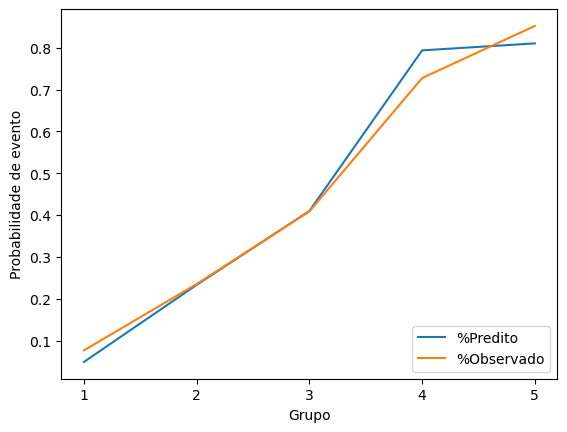

In [43]:
# Plotando o gráfico para acompanhar a faixa
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['contrair_doença'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [46]:
# Importando bibliotecas necessárias
from sklearn import metrics
from scipy.stats import ks_2samp

# Calculando acurácia
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

#Gini
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 77.56%
KS: 57.30% 
GINI: 67.13%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [47]:
reglog = smf.logit("flag_doente ~ sex + restecg + trestbps",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.623187
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 May 2023   Pseudo R-squ.:                 0.09649
Time:                        15:14:10   Log-Likelihood:                -188.83
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 9.065e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0723      1.035     -3.934      0.000      -6.101      -2.043
sex            1.3844      0.283      4.886      0.000       0.829       1.940
restecg        0.3204      0.125      2.565      0.010       0.076       0.565
trestbps       0.0198      0.007      2.686      0.007       0.005       0.034
==============================================================================
"""

In [49]:
# Calculando a probalidade
df['predito'] = reglog.predict(df)
# Dividindo em 5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
# Probalidade de evento predita média por grupo
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.098, 0.299]",66,0.204214
"(0.299, 0.424]",65,0.376628
"(0.424, 0.522]",55,0.481465
"(0.522, 0.626]",56,0.578010
"(0.626, 0.853]",61,0.691671


Utilizando restecg no lugar de CP, a probalidade caí consideravelmente, tornando o modelo pior.